<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/Flecha%20y%20cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 5.4 Flecha y Cojinete**
**Una flecha será ensamblada en un cojinete como se muestra a continuación:**

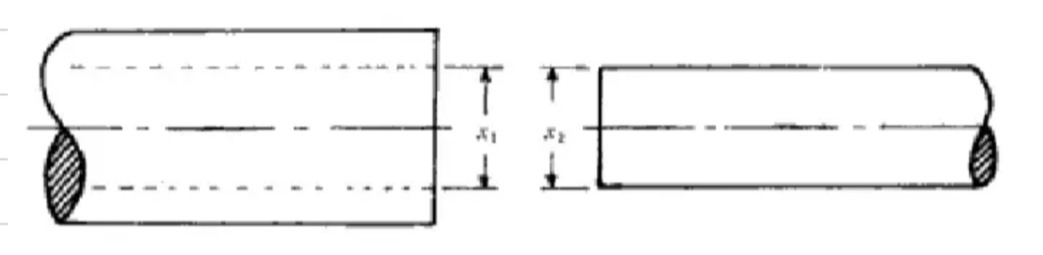
**Si $x_1$ sigue una distribución normal con media 1.5 y variancia 0.0016, y $x_2$ sigue esta misma distribución con media 1.48 y variancia 0.0009, determine:**

**a) La probabilidad de que haya interferencia.**

**b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.**

*Solución:*

Las dimensiones del diámetro de la flecha y del orificio del cojinete siguen distribuciones normales:

$ x_1 \sim N(1.5, 0.04^2) $ \\
$ x_2 \sim N(1.48, 0.03^2) $


### a) ¿Cuál es la probabilidad de que haya interferencia?
Condición de interferencia: $ x_2 ≥ x_1 $

Queremos calcular $ P(x_2 ≥ x_1) $

Dado que $x_1$ y $x_2$ son normales independientes, definimos una nueva variable:
$$ D = x_1 - x_2 ⇒ D \sim N(μ_D, σ^2_D) $$
Calculamos
*   La media: $ μ_D = μ_1 - μ_2 = 1.5-1.48 = 0.02 $
*   La varianza: $ σ^2_D = σ^2_1 - σ^2_2 = (0.04)^2 - (0.03)^2 = 0.0016-0.0009 = 0.0025 $
*   La desviación estándar: $ σ_D = \sqrt{0.0025} = 0.05 $

Entonces calculamos el estadístico Z:
$$ P(x_2 ≥ x_1) = P(D≤0) = P(Z ≤ \frac{0-0.02}{0.05}) = P(Z ≤ -0.4) $$
Buscando en la tabla de la normal estándar:
$$ P(Z \leq -0.4) \approx 0.3446 $$

Por lo tanto, la probabilidad de interferencia es aproximadamente **0.3446**.

### b) ¿Cuántas simulaciones son necesarias para estimar esa probabilidad con error menor a 0.01 y confianza del 95%?

Queremos que la estimación tenga un error menor a 0.01, con 95% de confianza. Usamos la fórmula del tamaño de muestra para una proporción:
$$ m = \frac{Z^2 \cdot p(1 - p)}{E^2} $$
Donde:
- $ Z = 1.96 $ (valor de la normal estándar para 95%)
- $ p = 0.3446 $
- $ E = 0.01 $

Sustituyendo:
$$ m = \frac{(1.96)^2 \cdot 0.3446(1 - 0.3446)}{(0.01)^2}
= \frac{3.8416 \cdot 0.2257}{0.0001}
= \frac{0.8676}{0.0001}
= 8676 $$

Asi, se deben realizar al menos **8676 simulaciones** para estimar la probabilidad con un error máximo de ±0.01 al 95% de confianza.

In [ ]:
# importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parámetros de las distribuciones
mu1 = 1.5
sigma1 = 0.04
mu2 = 1.48
sigma2 = 0.03

# Paso 1: Simulación de un experimento de n muestras
n = 10
def experimento(n):
    exitos = 0
    for i in range(n):
        x1 = np.random.normal(mu1, sigma1)
        x2 = np.random.normal(mu2, sigma2)
        if x2 >= x1:
            exitos += 1
    return exitos / n

In [ ]:
# Paso 2: Repetir el experimento m veces y recolectar los resultados
m = 1000
def muestra(m, n):
    resultados = []
    for i in range(m):
        p = experimento(n)
        resultados.append(p)
    return resultados

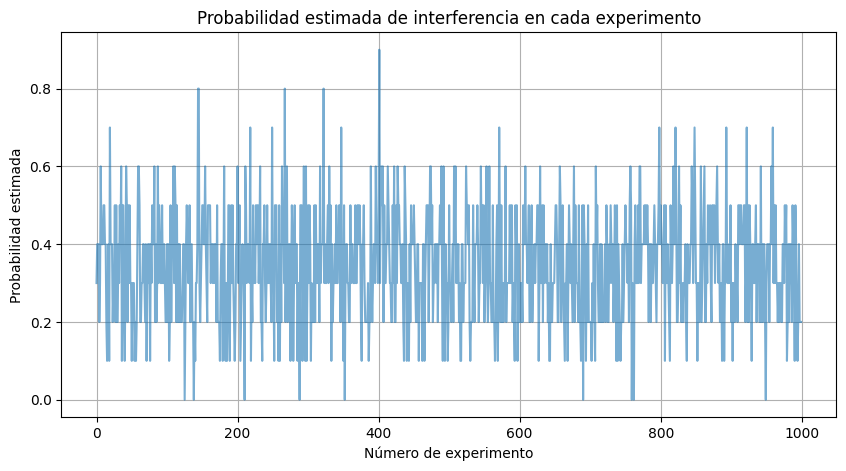

Probabilidad promedio estimada: 0.3440
Desviación estándar de la estimación: 0.1439


In [ ]:
# Ejecutar simulación
np.random.seed(42)  # Para reproducibilidad
resultados = muestra(m, n)

# Paso 3: Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(resultados, alpha=0.6)
plt.title("Probabilidad estimada de interferencia en cada experimento")
plt.xlabel("Número de experimento")
plt.ylabel("Probabilidad estimada")
plt.grid(True)
plt.show()

# Paso 4: Calcular estadísticos de interés
media_estimada = np.mean(resultados)
desviacion_estimada = np.std(resultados)

print(f"Probabilidad promedio estimada: {media_estimada:.4f}")
print(f"Desviación estándar de la estimación: {desviacion_estimada:.4f}")
